<a href="https://colab.research.google.com/github/faique1234/High-Blood-Pressure-Machine-Learning-Model-/blob/main/High_Blood_Pressure_(Machine_Learning_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muhammad Faique Bin Shahid**

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import joblib

# Step 2: Create Sample Dataset (Replace with your CSV if available)
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 70, 500),
    'BMI': np.random.normal(27, 5, 500),
    'Cholesterol': np.random.choice([150, 180, 200, 220, 250], 500),
    'Sodium': np.random.choice([1200, 1500, 1800, 2000, 2300], 500),
    'PhysicalActivity': np.random.choice([0, 1], 500),
    'Smoker': np.random.choice([0, 1], 500),
    'HighBP': np.random.choice([0, 1], 500, p=[0.65, 0.35])
})

# Step 3: Preprocessing
X = df.drop("HighBP", axis=1)
y = df["HighBP"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split and Balance
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Step 5: Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)
y_pred = model.predict(x_test)

# Step 6: Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 7: Save Model, Scaler, and Features
joblib.dump(model, "random_forest_HighBP_model.pkl")
joblib.dump(scaler, "highbp_scaler.pkl")
joblib.dump(X.columns.tolist(), "highbp_features.pkl")


Accuracy: 0.5466666666666666
Precision: 0.26785714285714285
Recall: 0.35714285714285715
F1 Score: 0.30612244897959184


['highbp_features.pkl']

/tmp/ipython-input-5-548309675.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#B80000", "#00008B"])


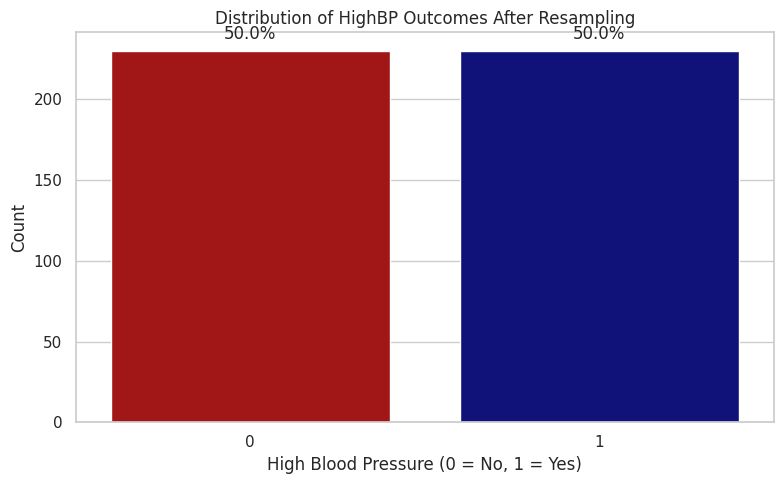

In [ ]:
# Get class counts after resampling
class_counts = pd.Series(y_train_resampled).value_counts()
class_percent = pd.Series(y_train_resampled).value_counts(normalize=True) * 100

# Create bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette=["#B80000", "#00008B"])

# Add labels and title
plt.title("Distribution of HighBP Outcomes After Resampling")
plt.xlabel("High Blood Pressure (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Show percentages on top of bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, f"{class_percent[i]:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()
